In [1]:
import numpy as np
from ase.io import read
from ase.spacegroup.symmetrize import FixSymmetry
from calorine.calculators import CPUNEP
from calorine.tools import get_force_constants, relax_structure
from pandas import DataFrame
from phonopy.units import THzToCm
from seekpath import get_explicit_k_path
import phonopy
from matplotlib import pyplot as plt

In [21]:
structure = read('HSE_DFT_Pnma_relaxed.in', format = 'aims')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

path = "GXMGRM"
special_points = dict(
    G = [0,0,0],
    M = [1/2, 1/2, 0],
    R = [1/2, 1/2, 1/2],
    X = [0, 1/2, 0]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

phonon_DFT = phonopy.load("BaZrS3_tilt_62/phonons/phonopy/output/phonopy.yaml")
phonon_DFT.run_band_structure(path_list)
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
print(df_DFT)
df_DFT.index = path_list

          0         1         2         3         4         5         6   \
0  -0.001336 -0.000493 -0.000390  1.353751  1.504537  1.703327  1.722084   
1   0.014540  0.015097  0.022813  1.354035  1.504549  1.703342  1.722108   
2   0.029086  0.030203  0.045682  1.354882  1.504587  1.703389  1.722180   
3   0.043625  0.045300  0.068537  1.356276  1.504646  1.703466  1.722303   
4   0.058156  0.060389  0.091385  1.358189  1.504724  1.703574  1.722477   
..       ...       ...       ...       ...       ...       ...       ...   
95  1.123114  1.141877  1.183623  1.200130  1.829691  1.839002  1.906205   
96  1.130957  1.149464  1.176336  1.193151  1.831059  1.838058  1.906912   
97  1.138720  1.156962  1.168971  1.186087  1.832374  1.837047  1.907615   
98  1.146402  1.161527  1.164374  1.178936  1.833632  1.835971  1.908311   
99  1.154004  1.154004  1.171698  1.171698  1.834832  1.834832  1.909000   

          7         8         9   ...        50        51        52        53  \
0   1.

NotImplementedError: > 1 ndim Categorical are not supported at this time

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

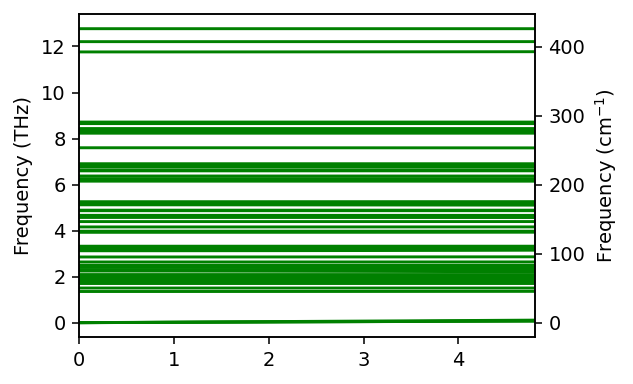

In [26]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='green')
ax.set_xlim(df.index.min(), df.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = special_points
#labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
#labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path_list))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()
plt.savefig('HSE_DFT_Pnma_phonons.png')

In [27]:
structure = read('HSE_DFT_I4_mcm_relaxed.in', format = 'aims')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

phonon_DFT = phonopy.load("BaZrS3_tilt_/phonons/phonopy/output/phonopy.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

FileNotFoundError: [Errno 2] No such file or directory: 'BaZrS3_tilt_/phonons/phonopy/output/phonopy.yaml'

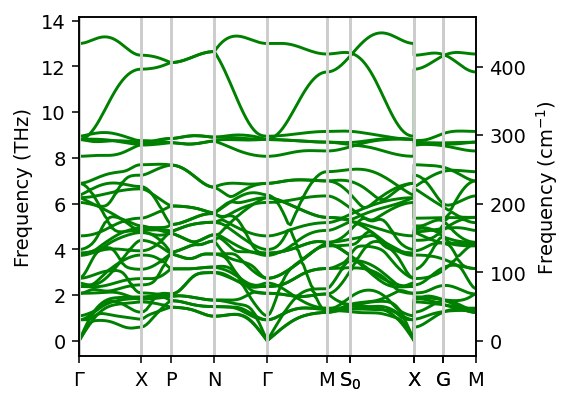

In [5]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='green')
ax.set_xlim(df.index.min(), df.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = path['explicit_kpoints_labels']
labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path['explicit_kpoints_linearcoord']))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()
plt.savefig('HSE_DFT_I4_mcm_phonons.png')

In [6]:
structure = read('HSE_DFT_Pm3m_relaxed.in', format = 'aims')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

phonon_DFT = phonopy.load("BaZrS3_tilt_221/phonons/phonopy/output/phonopy.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

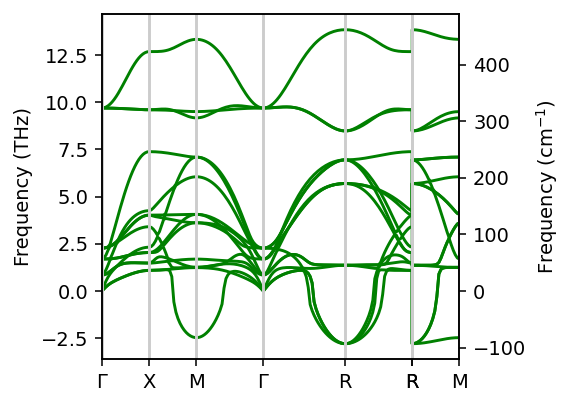

In [7]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='green')
ax.set_xlim(df.index.min(), df.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = path['explicit_kpoints_labels']
labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path['explicit_kpoints_linearcoord']))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()
plt.savefig('HSE_DFT_Pm3m_phonons.png')

In [8]:
structure = read('HSE_DFT_P4_mbm_relaxed.in', format = 'aims')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

phonon_DFT = phonopy.load("BaZrS3_tilt_127/phonons/phonopy/output/phonopy.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

FileNotFoundError: [Errno 2] No such file or directory: 'BaZrS3_tilt_127/phonons/phonopy/output/phonopy.yaml'

In [11]:
structure.cell.get_bravais_lattice()


TET(a=7.0094048564274453739, c=5.1132734082622164351)